In [ ]:
import pandas as pd 

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/rasbt/'
... 'python-machine-learning-book-3rd-edition'
... '/master/ch10/housing.data.txt',
... header=None,
... sep='\s+')

In [ ]:
df.columns = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']

In [ ]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from mlxtend.plotting import scatterplotmatrix
cols = ['LSTAT','INDUS','NOX','RM','MEDV']

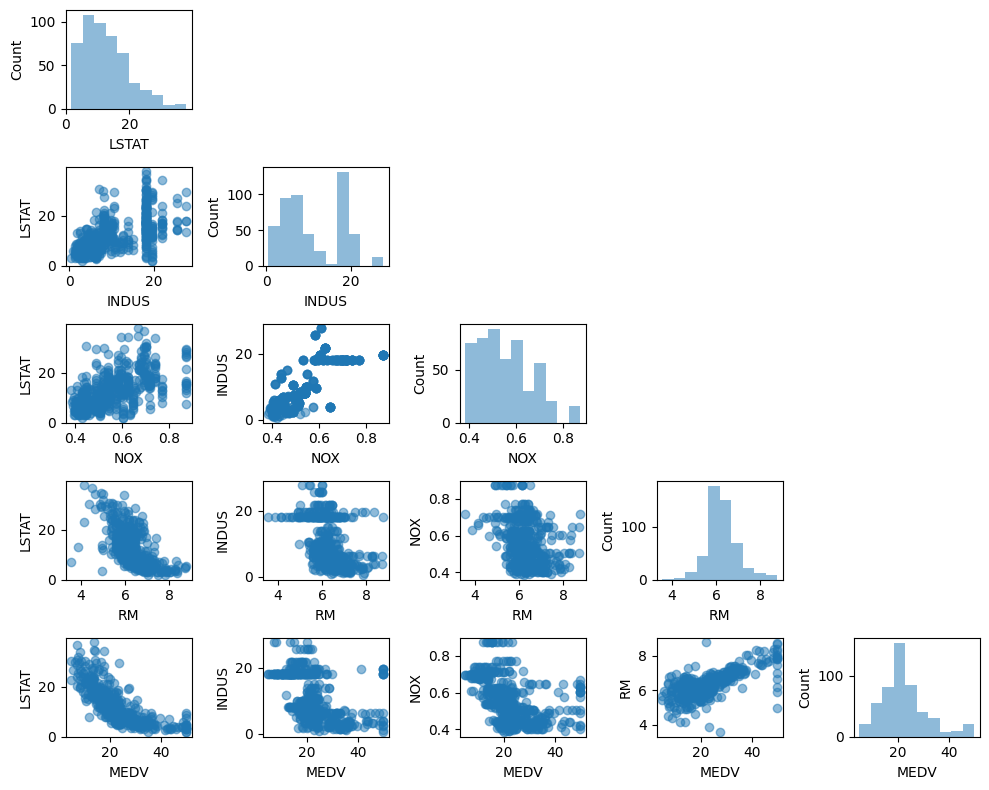

In [ ]:
scatterplotmatrix(df[cols].values,figsize=(10,8),names=cols,alpha=0.5) 
plt.tight_layout()
plt.show()

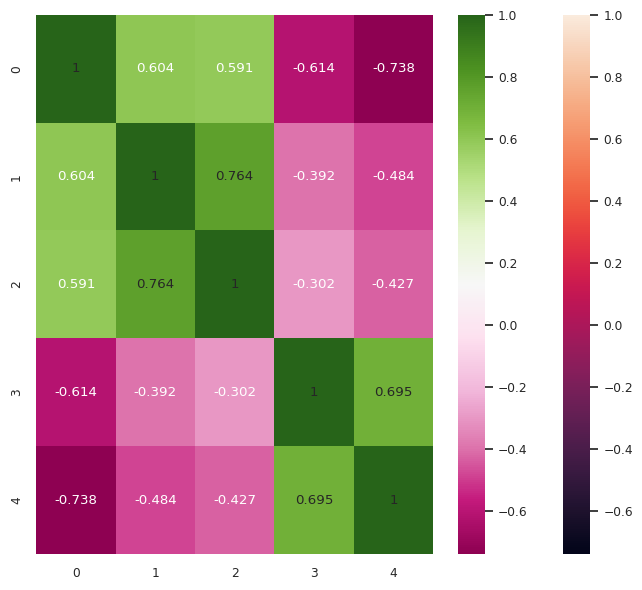

In [ ]:
import seaborn as sns
import numpy as np
cm = np.corrcoef(df[cols].values.T)
# hm = sns.heatmap(cm)
plt.figure(figsize = (8, 7))
sns.set(font_scale=0.8)
sns.heatmap(cm,annot=True,fmt='.3g')
sns.heatmap(cm,cmap='PiYG')
plt.show()

In [ ]:
X = df[['RM']].values
y = df['MEDV'].values
from sklearn.linear_model import LinearRegression
slr=LinearRegression()
slr.fit(X,y)
print('Slope: %.3f' % slr.coef_[0])
print('Intercept: %.3f' % slr.intercept_)

Slope: 9.102
Intercept: -34.671


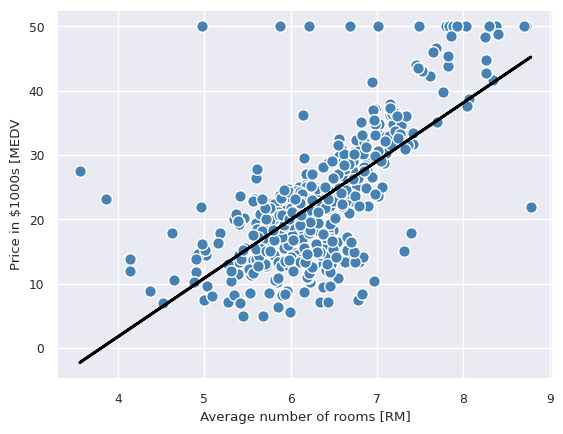

In [ ]:
def lin_regplot(X,y,model):
  plt.scatter(X,y,c='steelblue',edgecolor='white',s=70)
  plt.plot(X,model.predict(X), color='black',lw=2)
  return None

lin_regplot(X, y, slr)
plt.xlabel("Average number of rooms [RM]")
plt.ylabel("Price in $1000s [MEDV")
plt.show()

In [ ]:
#Split the dataset
from sklearn.model_selection import train_test_split
X = df.iloc[:,:-1].values
y=df['MEDV'].values
X_train, X_test,y_train, y_test=train_test_split(X,y,
                                                 test_size=0.3,random_state=0)
slr=LinearRegression()
slr.fit(X_train, y_train)
y_train_pred=slr.predict(X_train)
y_test_pred=slr.predict(X_test)